/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train epoch:  0  batch index:  0 loss:  2.302966356277466
train epoch:  0  batch index:  10 loss:  2.279083490371704
train epoch:  0  batch index:  20 loss:  2.2352263927459717
train epoch:  0  batch index:  30 loss:  2.1811885833740234
train epoch:  0  batch index:  40 loss:  2.1000328063964844
train epoch:  0  batch index:  50 loss:  2.0666921138763428
train epoch:  0  batch index:  60 loss:  2.0230133533477783
train epoch:  0  batch index:  70 loss:  1.9801832437515259
train epoch:  0  batch index:  80 loss:  1.9622899293899536
train epoch:  0  batch index:  90 loss:  1.9193999767303467
train epoch:  0  batch index:  100 loss:  1.8846735954284668
train epoch:  0  batch index:  110 loss:  1.885651707649231

test epoch:  0 accuracy:  0.7682

train epoch:  1  batch index:  0 loss:  1.8655095100402832
train epoch:  1  batch index:  10 loss:  1.85456120967865
train epoch:  1  batch index:  20 loss:  1.7890939712524414
train epoch:  1  batch index:  30 loss:  1.796613097190857
train epoch

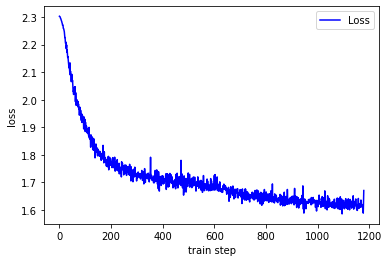

In [2]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt
batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                       train=True, download=True,
                       transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                      train=False, download=True,
                      transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.Layer1 = nn.Linear(28*28, 10)
        # if Dropout:
        #     self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.softmax(self.Layer1(x))
        if Dropout:
            # x = self.dropout(x)
            x = F.dropout(x, p=0.5, training=self.training)

        return x


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_SR.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_SR.append(accuracy)
    print('\ntest epoch: ', epoch, 'accuracy: ', accuracy)
    print()


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_SR = []
accuracy_SR = []
Dropout = False
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_SR)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train epoch:  0  batch index:  0 loss:  2.3167173862457275
train epoch:  0  batch index:  10 loss:  2.283560037612915
train epoch:  0  batch index:  20 loss:  2.2311041355133057
train epoch:  0  batch index:  30 loss:  2.184201717376709
train epoch:  0  batch index:  40 loss:  2.118617057800293
train epoch:  0  batch index:  50 loss:  2.101313591003418
train epoch:  0  batch index:  60 loss:  2.012674570083618
train epoch:  0  batch index:  70 loss:  1.980544090270996
train epoch:  0  batch index:  80 loss:  1.9814330339431763
train epoch:  0  batch index:  90 loss:  1.924246072769165
train epoch:  0  batch index:  100 loss:  1.9384005069732666
train epoch:  0  batch index:  110 loss:  1.9133877754211426

test epoch:  0 accuracy:  0.4049

train epoch:  1  batch index:  0 loss:  1.8687111139297485
train epoch:  1  batch index:  10 loss:  1.8620326519012451
train epoch:  1  batch index:  20 loss:  1.8598546981811523
train epoch:  1  batch index:  30 loss:  1.8837965726852417
train epoch:

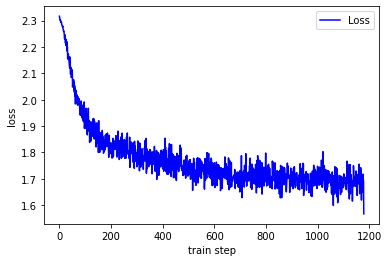

In [3]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt
batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                       train=True, download=True,
                       transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                      train=False, download=True,
                      transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = True


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.Layer1 = nn.Linear(28*28, 10)
        # if Dropout:
        #     self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.softmax(self.Layer1(x))
        if Dropout:
            # x = self.dropout(x)
            x = F.dropout(x, p=0.5, training=self.training)

        return x


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_SR_drop.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_SR_drop.append(accuracy)
    print('\ntest epoch: ', epoch, 'accuracy: ', accuracy)
    print()


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_SR_drop = []
accuracy_SR_drop = []
Dropout = True
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_SR_drop)

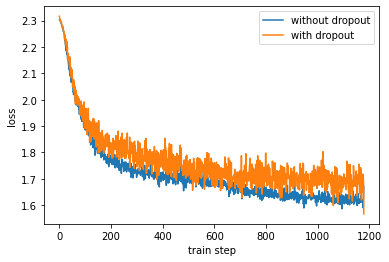

In [4]:
plt.plot(range(len(loss_collect_SR)), loss_collect_SR, label="without dropout")
plt.legend()
plt.plot(range(len(loss_collect_SR_drop)), loss_collect_SR_drop, label="with dropout")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

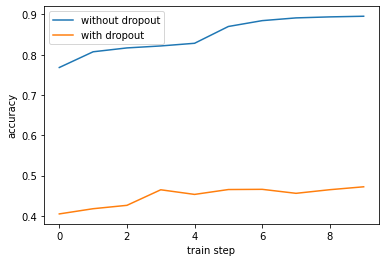

In [5]:
plt.plot(range(len(accuracy_SR)), accuracy_SR, label="without dropout")
plt.legend()
plt.plot(range(len(accuracy_SR_drop)), accuracy_SR_drop, label="with dropout")
plt.legend()
plt.xlabel("train step")
plt.ylabel("accuracy")
plt.show()